### 1. General EDA

#### Dataset Selection

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)
og_data = pd.read_csv("Sample - Superstore1.csv")
data = og_data

In [ ]:
data.head()

#### Clean Data

* Dealing with missing values

In [ ]:
data.isna().sum()

There are no missing values in this dataset, but when we encounter the missing values we can deal them with removing of filling the missing places depends on the data.

* Duplicates

In [ ]:
data.shape

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.shape

There is no change before and after the duplicates removal that means there are no duplicates.

* Outlier handling analysis

In [ ]:
import numpy as np
from scipy import stats

# Detecting and handling outliers using IQR (Interquartile Range)
Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier handling with IQR
data_iqr_cleaned = data[~((data.select_dtypes(include=[np.number]) < lower_bound) | 
                          (data.select_dtypes(include=[np.number]) > upper_bound)).any(axis=1)]
print("After IQR outlier removal:", data_iqr_cleaned.shape)

# Outlier handling with Z-score
z_scores = np.abs(stats.zscore(data_iqr_cleaned.select_dtypes(include=[np.number])))
data_cleaned = data_iqr_cleaned[(z_scores < 3).all(axis=1)]
print("After Z-score outlier removal:", data_cleaned.shape)

#### Statistical Analysis

In [ ]:
data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True)

#### Data Visualization

In [ ]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
data_cleaned[num_cols].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

* `Sales` data is right skewed, and the maximum values lie between range [15-88]. But lowest is 1 and highest value stretches to 351.
* `Quantity` is always in [1-9]. and 95% data lies between 2-4.
* `Discount` has least unique values and maximum amount of values is 0.2
* `Profit` lies in negative also. and lies between [1-20]

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols) + 1) // 2, i)
    sns.boxplot(y=data_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

From the box plots we can observe that outliers are there in 'sales', 'quantity', 'profit'. But they are not outliers because when we observed the data the values made sense.

* sales trend over time

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])
sales_trend = data_cleaned.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_trend, color='lightblue', linestyle='-')
plt.title("Sales Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

* Trend of Category

In [ ]:

category_sales = data_cleaned.groupby('Category')['Sales'].sum().sort_values()

sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title("Sales by Product Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

### 2. Sales Performance Analysis

In [76]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset Selection and Loading

In [77]:
og_data = pd.read_csv('SuperStoreOrders.csv')
data = og_data

In [78]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [79]:
data.shape

(51290, 21)

In [80]:
data.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [81]:
data.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [82]:
data.drop_duplicates(inplace = True)

In [83]:
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True, errors='coerce')

* sales trend

In [84]:
data['sales'] = pd.to_numeric(data['sales'], errors='coerce')
sales = data.groupby('order_date')['sales'].sum()

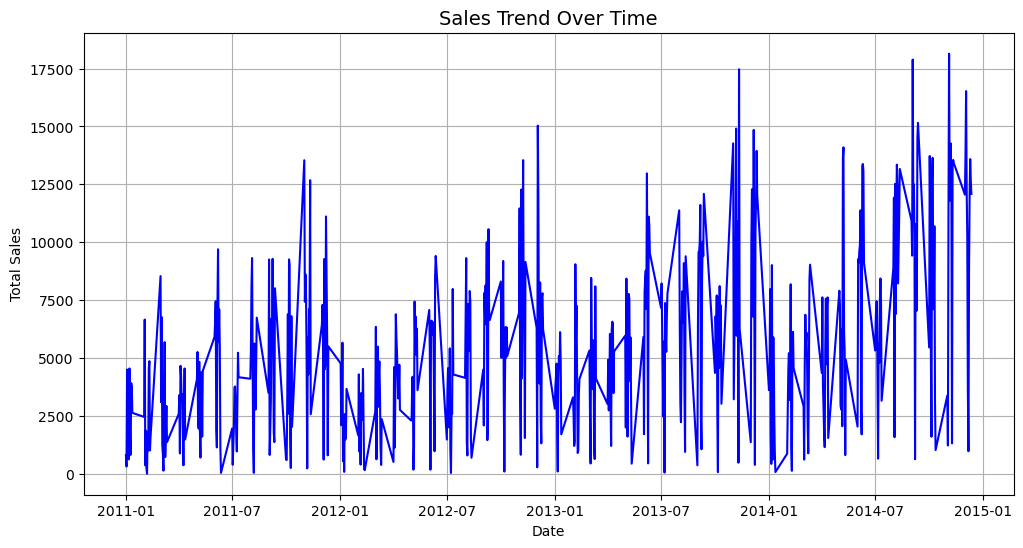

In [85]:
plt.figure(figsize=(12,6))
plt.plot(sales,linestyle='-', color = 'blue')
plt.title("Sales Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

#### scatter plot to study the relationship between Profit and Discount

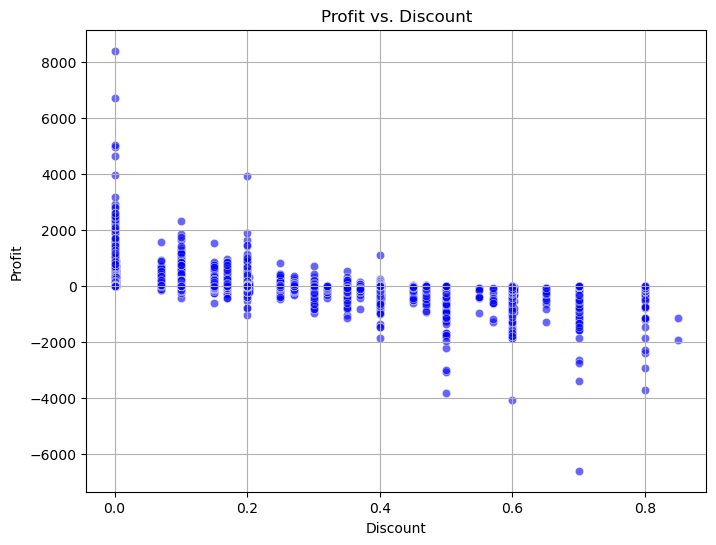

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['discount'], y=data['profit'], alpha=0.6, color='blue')
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

#### sales distribution by Region

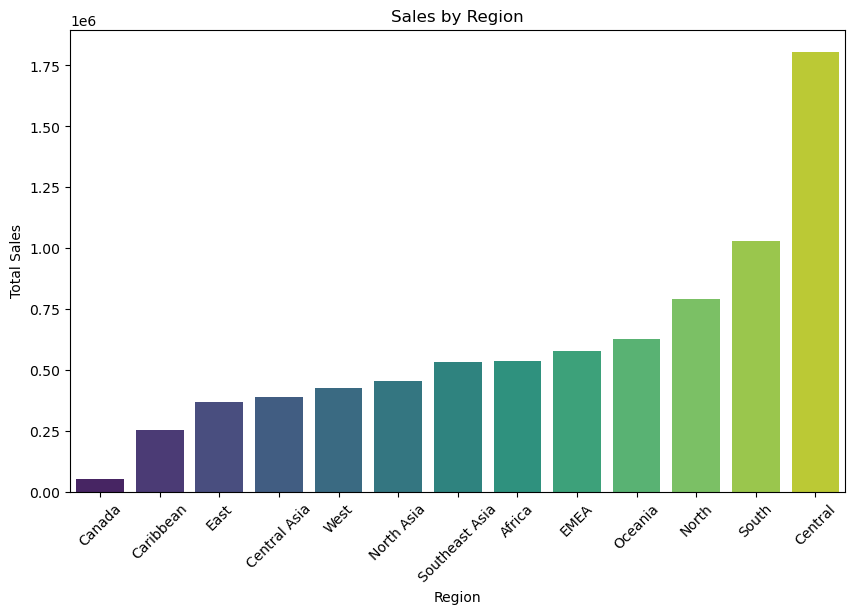

In [87]:
region_sales = data.groupby('region')['sales'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

#### sales distribution by category

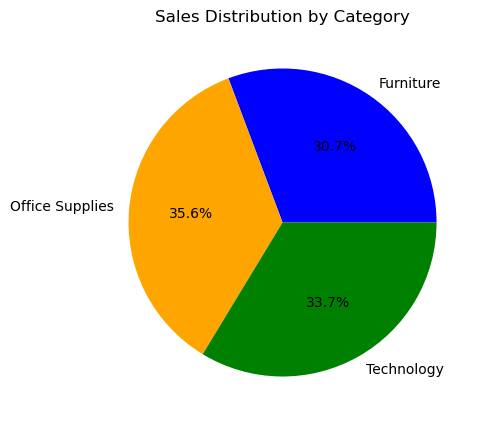

In [88]:
category_sales = data.groupby('category')['sales'].sum()

plt.figure(figsize=(5, 5))
plt.pie(category_sales, labels=category_sales.index, autopct="%1.1f%%", colors=['blue', 'orange', 'green'])
plt.title("Sales Distribution by Category")
plt.show()

#### Train a Linear Regression Model to predict Sales using Profit and Discount as features

In [89]:
data.dropna(subset=['sales', 'profit', 'discount'], inplace=True)

In [90]:
x = data[['sales', 'profit']]
y = data['discount']

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=31) 

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")

🔹 Mean Squared Error (MSE): 0.04
🔹 R² Score: 0.2294


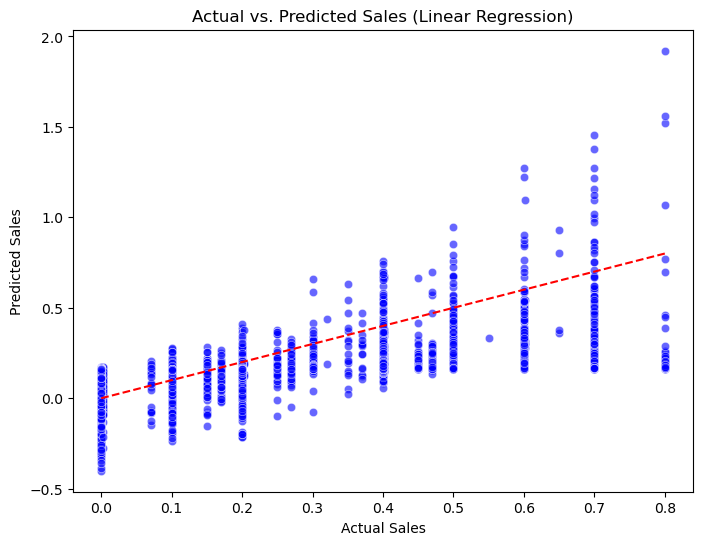

In [96]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--") 
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Linear Regression)")
plt.show()